In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

warnings.filterwarnings("ignore") 

In [3]:
import pandas as pd

Tour_data = pd.read_csv('tourism_dataset.csv', delimiter=',')

Tour_data.head

<bound method NDFrame.head of         Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0                        Yes  
1                         No  
2                        Yes  
3                

In [4]:
X = Tour_data.drop(columns='Accommodation_Available', axis=1)  
Y = Tour_data['Accommodation_Available']                      


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=45)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assuming 'Accommodation_Available' is the target variable
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']

# Convert non-numeric Y if needed
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

Y_pred = logistic_model.predict(X_test)

# Evaluation metrics for classification
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.5325542570951586
Confusion Matrix:
 [[292 316]
 [244 346]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.48      0.51       608
           1       0.52      0.59      0.55       590

    accuracy                           0.53      1198
   macro avg       0.53      0.53      0.53      1198
weighted avg       0.53      0.53      0.53      1198



In [7]:
input_data_str = ['62', '0', '0', '140', '268', '0', '0', '160', '0', '3.6', '0', '2', '2']  # Example data
input_data = np.array(input_data_str, dtype=float).reshape(1, -1)

# Create a DataFrame with the same columns as X_train
input_df = pd.DataFrame(columns=X_train.columns)  # Empty DataFrame with X_train's structure
input_df.loc[0] = 0  # Initialize with zeros
input_df.iloc[0, :len(input_data[0])] = input_data[0]  # Fill in the provided data

# Make prediction using logistic regression model
prediction_prob = logistic_model.predict_proba(input_df)  # Get probability predictions

# The prediction for the class '1' (Accommodation is Available)
predicted_prob = prediction_prob[0][1]

# Convert probability to binary (>= 0.5 for 'Yes', < 0.5 for 'No')
if predicted_prob >= 0.5:
    print("Accommodation is Available (Yes)")
else:
    print("Accommodation is Not Available (No)")


Accommodation is Not Available (No)


In [8]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assuming 'Accommodation_Available' is the target variable
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']

# Convert non-numeric Y if needed
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

# Saving the trained model using pickle
filename = 'tour_data_model_logistic.sav'
pickle.dump(logistic_model, open(filename, 'wb'))

# Loading the saved model
loaded_model = pickle.load(open('tour_data_model_logistic.sav', 'rb'))

# Predict and evaluate with the loaded model
Y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Printing Accuracy, Confusion Matrix, and Classification Report
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Printing the names of all columns in the feature set (X)
for column in X.columns:
    print(column)


Accuracy: 0.5325542570951586
Confusion Matrix:
 [[292 316]
 [244 346]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.48      0.51       608
           1       0.52      0.59      0.55       590

    accuracy                           0.53      1198
   macro avg       0.53      0.53      0.53      1198
weighted avg       0.53      0.53      0.53      1198

Location
Country
Category
Visitors
Rating
Revenue


In [11]:
import time
from memory_profiler import memory_usage
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

def test_scalability(data, sizes=[500, 1000, 5000, 10000, 20000]):
    # Get the size of the dataset
    max_size = len(data)
    
    # Adjust sizes if necessary to avoid sampling more rows than available
    sizes = [size for size in sizes if size <= max_size]
    
    for size in sizes:
        subset_data = data.sample(n=size, random_state=42)
        X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
        Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
        
        # Split the data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        # Measure time and memory usage
        start_time = time.time()
        memory_start = memory_usage()[0]  # Get initial memory usage (first value)
        
        # Initialize and train the logistic regression model
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, Y_train)
        training_time = time.time() - start_time
        
        # Measure memory usage during training
        memory_used = memory_usage()[0] - memory_start  # Get the memory usage after training
        
        # Predict and measure prediction time
        start_time = time.time()
        Y_pred = model.predict(X_test)
        prediction_time = time.time() - start_time
        
        # Evaluate model performance
        accuracy = accuracy_score(Y_test, Y_pred)
        conf_matrix = confusion_matrix(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)
        
        print(f"Data Size: {size}")
        print(f"Training Time: {training_time:.4f} seconds")
        print(f"Prediction Time: {prediction_time:.4f} seconds")
        print(f"Memory Usage: {memory_used:.2f} MB")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print(f"Classification Report:\n{class_report}")
        print("-" * 50)

# Run the test with different data sizes
test_scalability(Tour_data)


Data Size: 500
Training Time: 0.2369 seconds
Prediction Time: 0.0154 seconds
Memory Usage: 0.02 MB
Accuracy: 0.5900
Confusion Matrix:
[[27 26]
 [15 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.51      0.57        53
           1       0.55      0.68      0.61        47

    accuracy                           0.59       100
   macro avg       0.60      0.60      0.59       100
weighted avg       0.60      0.59      0.59       100

--------------------------------------------------
Data Size: 1000
Training Time: 0.4401 seconds
Prediction Time: 0.0342 seconds
Memory Usage: 0.02 MB
Accuracy: 0.4950
Confusion Matrix:
[[57 38]
 [63 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.60      0.53        95
           1       0.53      0.40      0.45       105

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.49       2

In [12]:
from sklearn.metrics import precision_score

# Binary threshold for precision
threshold = 0.5
Y_pred_binary = (Y_pred > threshold).astype(int)
precision = precision_score(Y_test, Y_pred_binary)
print(f"Precision: {precision:.4f}")


Precision: 0.5227


In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('tourism_dataset.csv')

# Verify column names to ensure the correct target column name
print("Dataset Columns:", dataset.columns)

# Assuming 'Accommodation_Available' is the target variable
X = dataset.drop(columns=['Accommodation_Available'], axis=1)
y = dataset['Accommodation_Available']

# Convert non-numeric Y if needed (if it's categorical like 'Yes'/'No')
y = y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target
print("Unique values in 'Accommodation_Available' after mapping:", y.unique())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test to numerical (dummy variables)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Dataset Columns: Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Unique values in 'Accommodation_Available' after mapping: [1 0]
Accuracy: 0.5325542570951586
Confusion Matrix:
 [[292 316]
 [244 346]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.48      0.51       608
           1       0.52      0.59      0.55       590

    accuracy                           0.53      1198
   macro avg       0.53      0.53      0.53      1198
weighted avg       0.53      0.53      0.53      1198



In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('tourism_dataset.csv')

# Verify column names to ensure the correct target column name
print("Dataset Columns:", dataset.columns)

# Assuming 'Accommodation_Available' is the target variable
X = dataset.drop(columns=['Accommodation_Available'], axis=1)
Y = dataset['Accommodation_Available']

# Convert non-numeric Y if needed (if it's categorical like 'Yes'/'No')
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test to numerical (dummy variables)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# -------------------------
# Fairness Analysis
# -------------------------
# Group-wise evaluation based on 'Country' (example)
if 'Country' in dataset.columns:
    groups = dataset['Country'].unique()
    print("\nFairness Analysis by 'Country':")
    for group in groups:
        group_data = dataset[dataset['Country'] == group]
        if not group_data.empty:
            X_group = group_data.drop(columns=['Accommodation_Available'], axis=1)
            Y_group = group_data['Accommodation_Available']
            Y_group = Y_group.map({'Yes': 1, 'No': 0})  # Convert to numeric
            
            # Convert categorical data to dummies
            X_group = pd.get_dummies(X_group, drop_first=True)
            
            # Align columns to match training data
            X_group = X_group.reindex(columns=X_train.columns, fill_value=0)
            
            # Predict for this group
            Y_group_pred = logistic_model.predict(X_group)
            
            # Evaluate
            group_accuracy = accuracy_score(Y_group, Y_group_pred)
            group_conf_matrix = confusion_matrix(Y_group, Y_group_pred)
            group_class_report = classification_report(Y_group, Y_group_pred)
            
            print(f"Country: {group}")
            print(f"  Group Accuracy: {group_accuracy}")
            print(f"  Group Confusion Matrix:\n{group_conf_matrix}")
            print(f"  Group Classification Report:\n{group_class_report}")
else:
    print("No 'Country' column found for fairness analysis.")


Dataset Columns: Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Accuracy: 0.5325542570951586
Confusion Matrix:
 [[292 316]
 [244 346]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.48      0.51       608
           1       0.52      0.59      0.55       590

    accuracy                           0.53      1198
   macro avg       0.53      0.53      0.53      1198
weighted avg       0.53      0.53      0.53      1198


Fairness Analysis by 'Country':
Country: India
  Group Accuracy: 0.5078125
  Group Confusion Matrix:
[[193 254]
 [187 262]]
  Group Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.43      0.47       447
           1       0.51      0.58      0.54       449

    accuracy                           0.51       896
   macro avg       0.51      0.51      0.50       896
w

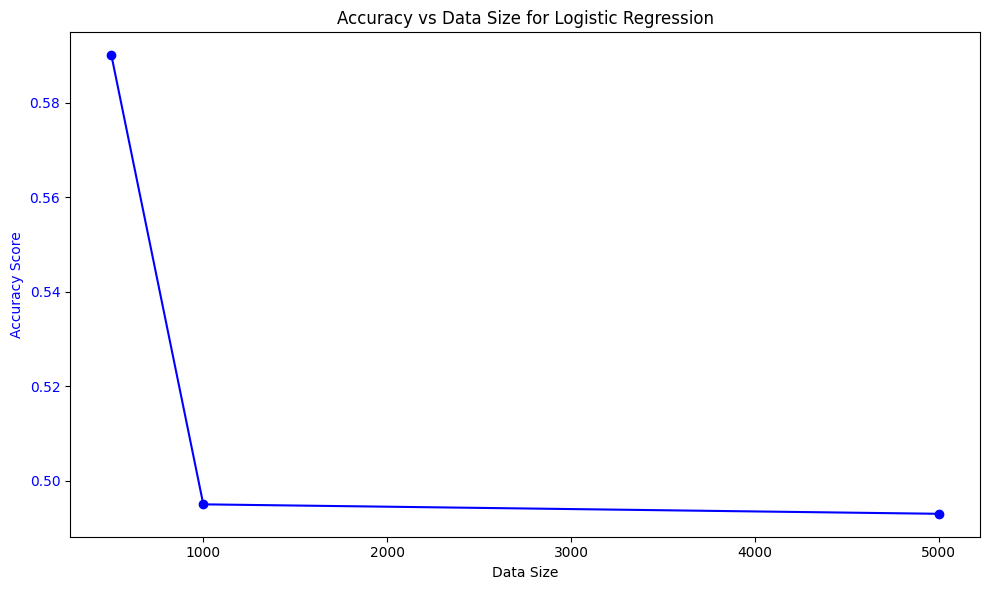

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming the dataset is already loaded in 'Tour_data'
# Verify the data's size
data_size = len(Tour_data)

# Define sample sizes based on the available data
data_sizes = [500, 1000, 5000, 10000, 20000]
data_sizes = [size for size in data_sizes if size <= data_size]  # Adjust if size exceeds data

# Function to plot accuracy metrics (accuracy score)
def plot_accuracy_metrics(subset_data):
    X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
    Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Initialize and train the Logistic Regression model
    logistic_model = LogisticRegression(max_iter=1000)
    logistic_model.fit(X_train, Y_train)
    
    # Predict and evaluate
    Y_pred = logistic_model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    
    return accuracy

# Lists to store values for plotting
accuracy_values = []

# Loop through different data sizes and collect accuracy values
for size in data_sizes:
    subset_data = Tour_data.sample(n=size, random_state=42)  # Sample data
    accuracy = plot_accuracy_metrics(subset_data)
    accuracy_values.append(accuracy)

# Plot accuracy on the graph
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel('Data Size')
ax.set_ylabel('Accuracy Score', color='b')
ax.plot(data_sizes, accuracy_values, marker='o', color='b', label='Accuracy Score')
ax.tick_params(axis='y', labelcolor='b')

# Add a title and show the plot
plt.title('Accuracy vs Data Size for Logistic Regression')
fig.tight_layout()
plt.show()


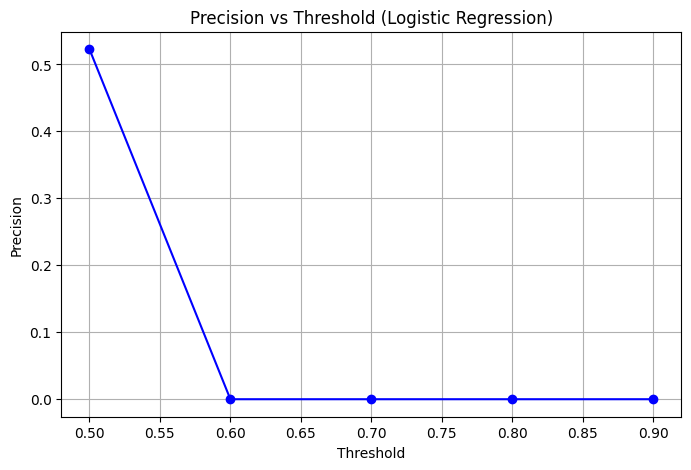

In [18]:
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Function to calculate precision at different thresholds for Logistic Regression
def plot_precision_logistic(Y_test, Y_pred_prob):
    thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
    precisions = []
    
    for threshold in thresholds:
        Y_pred_binary = (Y_pred_prob[:, 1] > threshold).astype(int)  # Get probability of the positive class
        precision = precision_score(Y_test, Y_pred_binary)
        precisions.append(precision)
    
    # Plot Precision vs Threshold
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precisions, marker='o', linestyle='-', color='b')
    plt.title('Precision vs Threshold (Logistic Regression)')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

# Assuming the Logistic Regression model is trained, and Y_pred_prob contains predicted probabilities
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)

# Get predicted probabilities
Y_pred_prob = logistic_model.predict_proba(X_test)

# Call the precision plotting function
plot_precision_logistic(Y_test, Y_pred_prob)


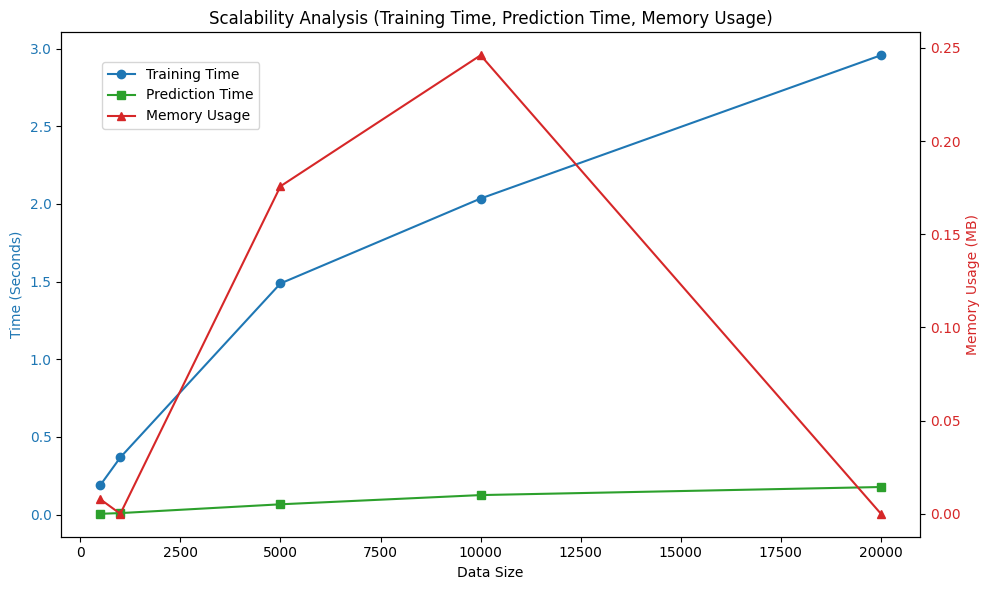

In [19]:
import time
import psutil
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Function to track memory usage
def memory_usage_psutil():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # in MB

# Function to test scalability with an adjustment to sample sizes
def test_scalability(data, sizes=[500, 1000, 5000, 10000, 20000]):
    # Lists to store performance metrics
    train_times = []
    pred_times = []
    memory_usage_list = []
    
    # Check the size of the data
    data_size = len(data)
    
    for size in sizes:
        # Adjust the sample size if it exceeds the data size
        sample_size = min(size, data_size)
        
        subset_data = data.sample(n=sample_size, random_state=42)
        X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
        Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
        
        # Split the data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        # Measure time and memory usage
        start_time = time.time()
        start_memory = memory_usage_psutil()

        # Initialize and train the Logistic Regression model
        model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence if needed
        model.fit(X_train, Y_train)
        training_time = time.time() - start_time
        
        # Measure memory usage during training
        memory_used = memory_usage_psutil() - start_memory
        
        # Predict and measure prediction time
        start_time = time.time()
        Y_pred = model.predict(X_test)
        prediction_time = time.time() - start_time
        
        train_times.append(training_time)
        pred_times.append(prediction_time)
        memory_usage_list.append(memory_used)

    # Plot the results
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot training time and prediction time
    ax1.set_xlabel('Data Size')
    ax1.set_ylabel('Time (Seconds)', color='tab:blue')
    ax1.plot(sizes, train_times, label='Training Time', color='tab:blue', marker='o')
    ax1.plot(sizes, pred_times, label='Prediction Time', color='tab:green', marker='s')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis to plot memory usage
    ax2 = ax1.twinx()
    ax2.set_ylabel('Memory Usage (MB)', color='tab:red')
    ax2.plot(sizes, memory_usage_list, label='Memory Usage', color='tab:red', marker='^')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add titles and legends
    ax1.set_title('Scalability Analysis (Training Time, Prediction Time, Memory Usage)')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

    plt.show()

# Test scalability with data sizes
test_scalability(Tour_data)


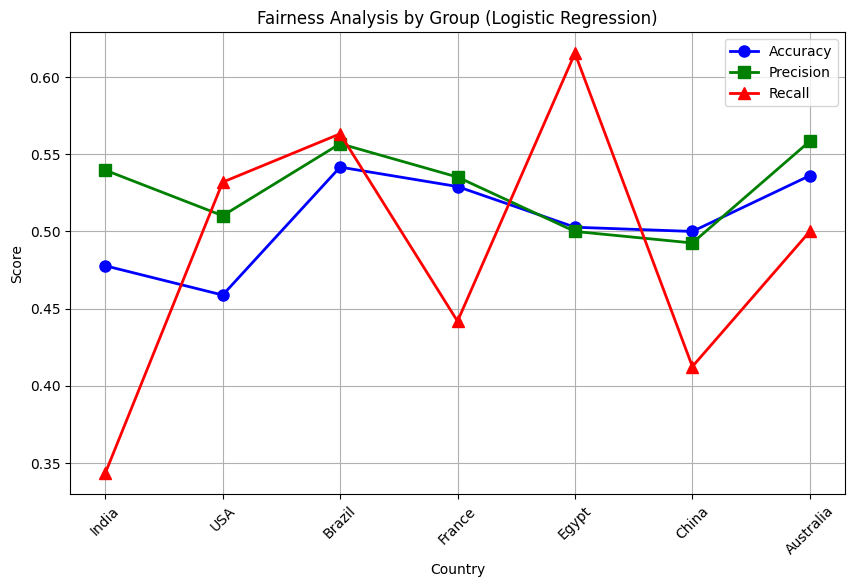

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score

def plot_fairness_by_group(data, group_column='Country'):
    accuracy_groupwise = []
    precision_groupwise = []
    recall_groupwise = []
    
    if group_column in data.columns:
        groups = data[group_column].unique()
        for group in groups:
            group_data = data[data[group_column] == group]
            X_group = group_data.drop(columns=['Accommodation_Available'], axis=1)
            Y_group = group_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
            
            # Split data
            X_train, X_test, Y_train, Y_test = train_test_split(X_group, Y_group, test_size=0.2, random_state=42)
            X_train = pd.get_dummies(X_train, drop_first=True)
            X_test = pd.get_dummies(X_test, drop_first=True)
            X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
            
            # Train and predict using Logistic Regression
            model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            
            # Calculate performance metrics
            accuracy = accuracy_score(Y_test, Y_pred)
            precision = precision_score(Y_test, Y_pred)
            recall = recall_score(Y_test, Y_pred)
            
            accuracy_groupwise.append(accuracy)
            precision_groupwise.append(precision)
            recall_groupwise.append(recall)

        # Plot fairness metrics (Accuracy, Precision, and Recall per group)
        plt.figure(figsize=(10, 6))
        plt.plot(groups, accuracy_groupwise, label='Accuracy', marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
        plt.plot(groups, precision_groupwise, label='Precision', marker='s', color='green', linestyle='-', linewidth=2, markersize=8)
        plt.plot(groups, recall_groupwise, label='Recall', marker='^', color='red', linestyle='-', linewidth=2, markersize=8)
        
        plt.xlabel(group_column)
        plt.ylabel('Score')
        plt.title('Fairness Analysis by Group (Logistic Regression)')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{group_column}' not found in data.")

# Run fairness analysis by 'Country' column using Logistic Regression
plot_fairness_by_group(Tour_data)


Run 1/10
Run 1 completed - Accuracy: 0.5125208681135225, Precision: 0.5230263157894737, Recall: 0.5196078431372549
Run 2/10
Run 2 completed - Accuracy: 0.5125208681135225, Precision: 0.5230263157894737, Recall: 0.5196078431372549
Run 3/10
Run 3 completed - Accuracy: 0.5125208681135225, Precision: 0.5230263157894737, Recall: 0.5196078431372549
Run 4/10
Run 4 completed - Accuracy: 0.5125208681135225, Precision: 0.5230263157894737, Recall: 0.5196078431372549
Run 5/10
Run 5 completed - Accuracy: 0.5125208681135225, Precision: 0.5230263157894737, Recall: 0.5196078431372549
Run 6/10
Run 6 completed - Accuracy: 0.5125208681135225, Precision: 0.5230263157894737, Recall: 0.5196078431372549
Run 7/10
Run 7 completed - Accuracy: 0.5125208681135225, Precision: 0.5230263157894737, Recall: 0.5196078431372549
Run 8/10
Run 8 completed - Accuracy: 0.5125208681135225, Precision: 0.5230263157894737, Recall: 0.5196078431372549
Run 9/10
Run 9 completed - Accuracy: 0.5125208681135225, Precision: 0.5230263157

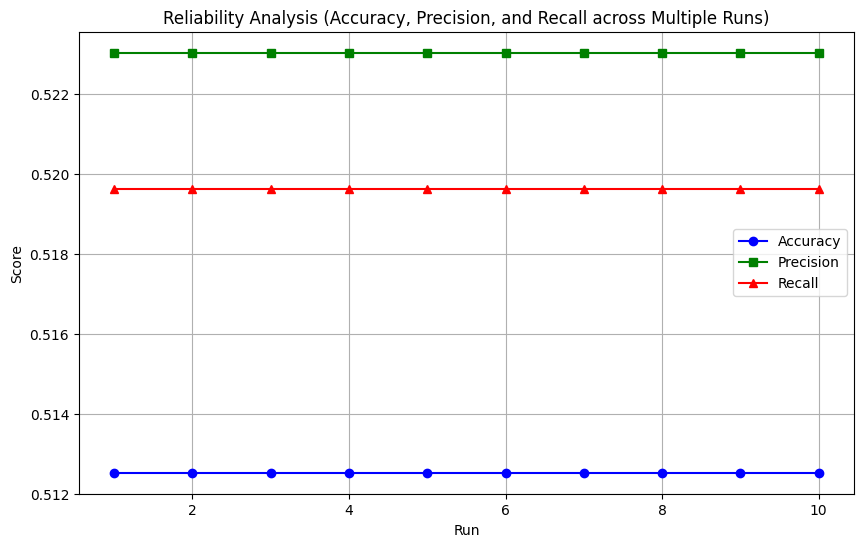

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Function to check model reliability over multiple runs using Logistic Regression
def plot_reliability(data, num_runs=10):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")  # Print which run is being processed
        X = data.drop(columns=['Accommodation_Available'], axis=1)
        Y = data['Accommodation_Available'].map({'Yes': 1, 'No': 0})

        # Split data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        # Initialize and train the Logistic Regression model
        model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
        model.fit(X_train, Y_train)

        # Predict and evaluate
        Y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred)
        recall = recall_score(Y_test, Y_pred)
        
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        print(f"Run {run + 1} completed - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")  # Print the scores of each run

    # Plot Accuracy, Precision, and Recall across runs
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_runs + 1), accuracy_scores, label='Accuracy', marker='o', color='blue')
    plt.plot(range(1, num_runs + 1), precision_scores, label='Precision', marker='s', color='green')
    plt.plot(range(1, num_runs + 1), recall_scores, label='Recall', marker='^', color='red')
    plt.xlabel('Run')
    plt.ylabel('Score')
    plt.title('Reliability Analysis (Accuracy, Precision, and Recall across Multiple Runs)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run reliability analysis on the data using Logistic Regression
plot_reliability(Tour_data)
